<a href="https://colab.research.google.com/github/imranmurtaza110/Clustering_Algorithm/blob/main/clustering_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [11]:
import os

In [12]:
def read_data(directory_path):
  current_directory = os.getcwd()
  path = current_directory + '/sample_data/dataset'
  data = []
  try:
    with open(path, 'r') as file:
      for line in file:
        data.append(line.strip().split(' '))

  except Exception as e:
    print("An error occurred:", e)

  return data

directory_path = '/sample_data/dataset'
data = read_data(directory_path)

In [13]:
data = [row[1:] for row in data]

In [14]:
def euclidean_distance(x, y):
    return np.linalg.norm(np.array(x, dtype=float) - np.array(y, dtype=float))

In [15]:
def initialization(k, data, seed_value):
    np.random.seed(seed_value)
    data = np.array(data)

    indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[indices]
    return centroids

k = 9
seed_value = 72
initial_centroids = initialization(9, data, 72)

In [16]:
import numpy as np

def k_mean_algorithm(initial_centroids, data):
    data = np.array(data)
    k = len(initial_centroids)
    centroids = np.array(initial_centroids, dtype=float)
    clusters = {i: [] for i in range(k)}

    while True:
        # Clear clusters for new assignments
        for i in clusters:
          clusters[i] = []

        # Assign each data point to the nearest centroid
        for idx, point in enumerate(data):
            distances = [euclidean_distance(point, centroids[j]) for j in range(k)]
            nearest_centroid_index = np.argmin(distances)
            clusters[nearest_centroid_index].append(idx)  # Assign index of the point

        # Calculate new centroids
        new_centroids = np.zeros_like(centroids)
        for i in range(k):
            if clusters[i]:
                numeric_data = np.array(data[clusters[i]], dtype=float)
                new_centroids[i] = np.mean(numeric_data, axis=0)
            else:  # If a cluster is empty, reinitialize it
                new_centroids[i] = data[np.random.randint(0, len(data))]

        # Check for convergence
        if np.allclose(centroids, new_centroids, atol=1e-4):
            break
        centroids = new_centroids

    return centroids, clusters


In [17]:
def get_centroids_and_clusters(initial_centroids, data):
  k = 9
  centroids = {}
  clusters = {}
  for i in range(k):
    centroids[i], clusters[i] = k_mean_algorithm(initial_centroids[:i+1], data)

  return centroids, clusters

In [18]:
centroids, clusters = get_centroids_and_clusters(initial_centroids, data)

In [19]:
total_length = 0
for i in range(len(clusters)):
  total_length = 0
  for j in range(len(clusters[i])):
    total_length += len(clusters[i][j])

  print(total_length)

print(len(centroids))
print(len(clusters[2][1]))

327
327
327
327
327
327
327
327
327
9
53


In [20]:
def distance_matrix(dataset, dist=euclidean_distance):
    N = len(dataset)
    dist_matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i < j:
                dist_value = dist(dataset[i], dataset[j])  # Correctly call the distance function
                dist_matrix[i][j] = dist_value
                dist_matrix[j][i] = dist_value  # Use the computed distance value

    return dist_matrix

dist_matrix = distance_matrix(data, euclidean_distance)

In [21]:
print(sum(dist_matrix[0])/(len(dist_matrix)-1))
for i in range(4):
  for j in range(1):
    print(dist_matrix[i][j])

8.446500795669056
0.0
6.911995739262059
7.2895758647311855
6.955781644872582


In [22]:
for cluster_id, points_indices in clusters.items():
    print(points_indices)
    for index in points_indices:
      print(points_indices[index])

    break

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

In [25]:
def silhouette_coefficient(dataset, clusters, dist_matrix):
    if len(clusters) < 2:
      return 0

    N = len(dataset)
    silhouette = np.zeros(N)
    a = np.zeros(N)
    b = np.full(N, np.inf)  # Initialize b to infinity for proper minimum comparison

    # Iterate over each cluster and each point within the cluster
    for cluster_id, points_indices in clusters.items():

        for index in points_indices:
            # Calculate intra-cluster distances (a[index])
            intra_distances = [dist_matrix[index, other] for other in points_indices if other != index]
            a[index] = np.mean(intra_distances) if intra_distances else 0  # Avoid division by zero

            # Calculate nearest other cluster distances (b[index])
            for other_cluster_id, other_points_indices in clusters.items():
                if other_cluster_id != cluster_id:
                    # Calculate all distances from current point to points in other clusters
                    inter_distances = [dist_matrix[index, other] for other in other_points_indices]
                    if inter_distances:
                        min_inter_distance = np.mean(inter_distances)
                        if min_inter_distance < b[index]:
                            b[index] = min_inter_distance


    # Calculate the silhouette coefficient for each object
    for i in range(N):
        if a[i] > 0:
            silhouette[i] = (b[i] - a[i]) / max(a[i], b[i])
        else:
            silhouette[i] = 0  # Can set to 0 or an appropriate value when a[i] is 0

    return np.mean(silhouette)



In [26]:
def get_silhouttee_scores(data, clusters, dist_matrix):
  silhouttee_scores = []
  for i in range(len(clusters)):
    clustering_index = {}
    for cluster_id, item in clusters[i].items():
      clustering_index[cluster_id] = item

    average_silhouette = silhouette_coefficient(data, clustering_index, dist_matrix)
    silhouttee_scores.append(average_silhouette)

  return silhouttee_scores


silhouttee_scores = get_silhouttee_scores(data, clusters, dist_matrix)

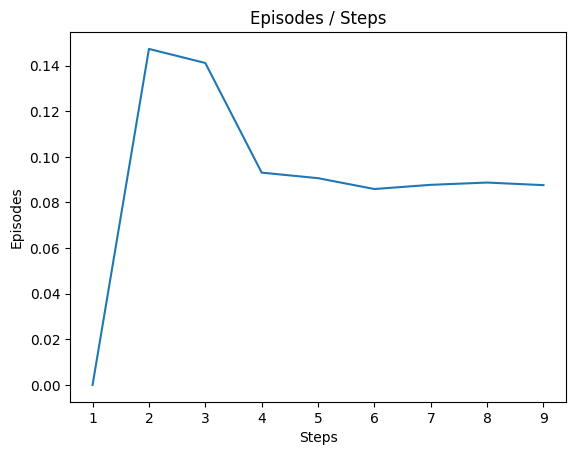

In [27]:
def graph_k_and_silhouttee(k, silhouttee):
  x_axis = [i for i in range(1, k+1)]
  y_axis = silhouttee
  plt.plot(x_axis, y_axis)
  plt.xlabel('Steps')
  plt.ylabel('Episodes')
  plt.title('Episodes / Steps')
  plt.show()

k = 9
graph_k_and_silhouttee(k, silhouttee_scores)

**Part 2**

In [28]:
def synthetic_dataset(x_points, y_points):
    return np.random.normal(loc=0, scale=1, size=(y_points, x_points))

y_points = len(data)
x_points = len(data[0])

synthetic_dataset = synthetic_dataset(x_points, y_points)

In [29]:
k = 9
seed_value = 72
synthetic_initial_centroids = initialization(k, synthetic_dataset, 72)

In [30]:
print(len(synthetic_initial_centroids[0]))

300


In [31]:
synthetic_centroids, synthetic_clusters = get_centroids_and_clusters(synthetic_initial_centroids, data)

In [32]:
synthetic_dist_matrix = distance_matrix(synthetic_dataset, euclidean_distance)

In [33]:
synthetic_silhouttee_scores = get_silhouttee_scores(synthetic_dataset, synthetic_clusters, synthetic_dist_matrix)

In [34]:
print(synthetic_silhouttee_scores)

[0, 0.00014812267622925818, -0.01876156255338792, -0.0029577159601162626, -0.013234784947130037, -0.00495117785157419, -0.011977778001504728, -0.033281691559869826, -0.043663155751992436]


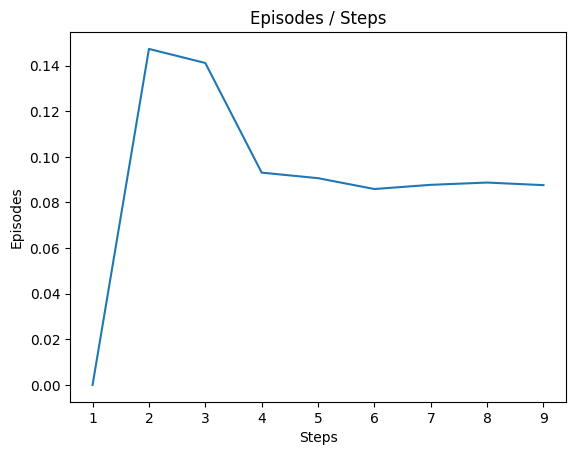

In [35]:
k = 9
graph_k_and_silhouttee(k, silhouttee_scores)

**Part 3**

In [36]:
def initialization_plus_plus(k, dist_matrix, data, seed_value):
    np.random.seed(seed_value)

    num_points = dist_matrix.shape[0]
    centroids = []

    # Randomly select the first centroid
    centroids.append(np.random.choice(num_points))

    # Select remaining centroids
    for _ in range(1, k):
        # Compute distances from each data point to the nearest centroid
        min_distances = np.min(dist_matrix[centroids], axis=0)

        # Choose the next centroid with probability proportional to squared distance
        probabilities = min_distances**2 / np.sum(min_distances**2)
        next_centroid_index = np.random.choice(num_points, p=probabilities)
        centroids.append(next_centroid_index)

    # Get the actual data points corresponding to the selected indices
    centroids = [data[index] for index in centroids]

    return centroids



initial_centroids_plus_plus = initialization_plus_plus(k, dist_matrix, data, seed_value)

In [37]:
len(initial_centroids_plus_plus)

9

In [38]:
plus_plus_centroids, plus_plus_clusters = get_centroids_and_clusters(initial_centroids_plus_plus, data)

In [39]:
silhouttee_scores_plus_plus = get_silhouttee_scores(synthetic_dataset, plus_plus_clusters, dist_matrix)

In [40]:
print(silhouttee_scores_plus_plus)

[0, 0.1473173032244062, 0.14115485263933597, 0.09292051472011063, 0.08723881295729154, 0.08244411087315939, 0.08419029669098146, 0.08546860271622171, 0.07468091755915589]


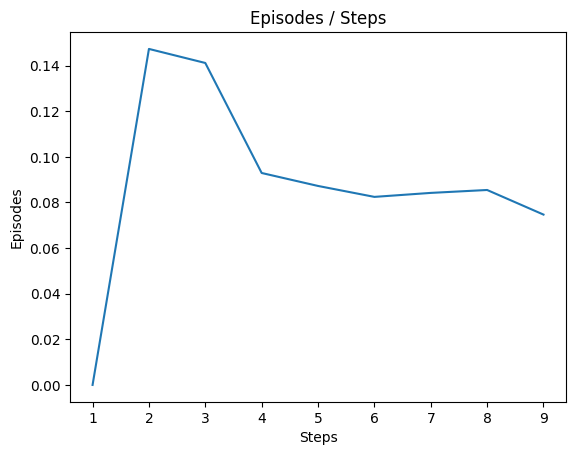

In [41]:
k = 9
graph_k_and_silhouttee(k, silhouttee_scores_plus_plus)

**Part** 4

In [42]:
def calculate_mse(cluster_points):
    # Check if the cluster is empty
    if len(cluster_points) == 0:
        return 0

    # Convert cluster_points to a numpy array of type float
    cluster_points = np.array(cluster_points, dtype=float)

    # Check the dimensions of the array
    if len(cluster_points.shape) > 1:
        # If multi-dimensional, calculate the centroid along axis 0 (per feature)
        centroid = np.mean(cluster_points, axis=0)
    else:
        # If it is 1D, the centroid is just the mean of the array
        centroid = np.mean(cluster_points)

    # Calculate the squared distances from each point to the centroid
    if len(cluster_points.shape) > 1:
        squared_distances = np.sum((cluster_points - centroid) ** 2, axis=1)
    else:
        squared_distances = (cluster_points - centroid) ** 2

    # Calculate the mean of the squared distances (MSE)
    mse = np.mean(squared_distances)

    return mse

In [43]:
def k_mean_algorithm(initial_centroids, data):
    data = np.array(data)
    k = len(initial_centroids)
    centroids = np.array(initial_centroids, dtype=float)
    clusters = {i: [] for i in range(k)}

    while True:
        # Clear clusters for new assignments
        for i in clusters:
          clusters[i] = []

        # Assign each data point to the nearest centroid
        for idx, point in enumerate(data):
            distances = [euclidean_distance(point, centroids[j]) for j in range(k)]
            nearest_centroid_index = np.argmin(distances)
            clusters[nearest_centroid_index].append(idx)  # Assign index of the point

        # Calculate new centroids
        new_centroids = np.zeros_like(centroids)
        for i in range(k):
            if clusters[i]:
                numeric_data = np.array(data[clusters[i]], dtype=float)
                new_centroids[i] = np.mean(numeric_data, axis=0)
            else:  # If a cluster is empty, reinitialize it
                new_centroids[i] = data[np.random.randint(0, len(data))]

        # Check for convergence
        if np.allclose(centroids, new_centroids, atol=1e-4):
            break
        centroids = new_centroids

    return centroids, clusters

In [44]:
def play_dataset(data):
  data = data[:2]
  new_dataset = []
  for i in range(len(data)):
    d = []
    for j in range(4):
      d.append(data[i][j])
      new_dataset.append(d)


  return new_dataset

dataset = play_dataset(data)
print(dataset)

[['-0.015926', '-0.079864', '-0.33218', '0.034246'], ['-0.015926', '-0.079864', '-0.33218', '0.034246'], ['-0.015926', '-0.079864', '-0.33218', '0.034246'], ['-0.015926', '-0.079864', '-0.33218', '0.034246'], ['0.47727', '-0.91587', '-0.2977', '-0.22489'], ['0.47727', '-0.91587', '-0.2977', '-0.22489'], ['0.47727', '-0.91587', '-0.2977', '-0.22489'], ['0.47727', '-0.91587', '-0.2977', '-0.22489']]


In [45]:


def bisecting_kmeans(dataset, num_clusters, seed_value=72):
    clusters = {}


    clusters[0] = dataset # Start with all data in one cluster
    total_length = 0


    while len(clusters) < num_clusters:
        max_sse = -1
        index_to_split = -1
        for i, cluster in enumerate(clusters.values()):
            print('Evaluating cluster:', i, 'with size:', len(cluster))
            if len(cluster) > 1:  # Ensure there are enough points to split
                sse = calculate_mse(cluster)
                if sse > max_sse:
                    max_sse = sse
                    index_to_split = i

        if index_to_split != -1:
            initial_centroids = initialization(2, clusters[index_to_split], seed_value)
            cluster_assignment = {}
            centroids, cluster_assignment = k_mean_algorithm(initial_centroids, clusters[index_to_split])
            new_clusters = {0: [], 1: []}

            for idx, assign in enumerate(cluster_assignment):
                points = [point for point in cluster_assignment[assign]]
                new_clusters[idx] = [data[point] for point in points]

            new_clusters = {k: np.array(v) for k, v in new_clusters.items()}

            # Update the list of clusters
            clusters[index_to_split] = new_clusters[0]
            clusters[max(clusters.keys()) + 1] = new_clusters[1]

            print(len(clusters))


    return clusters

In [46]:
num_clusters = 9
clusters = bisecting_kmeans(data, num_clusters, 72)

Evaluating cluster: 0 with size: 327
2
Evaluating cluster: 0 with size: 166
Evaluating cluster: 1 with size: 161
3
Evaluating cluster: 0 with size: 80
Evaluating cluster: 1 with size: 161
Evaluating cluster: 2 with size: 86
4
Evaluating cluster: 0 with size: 50
Evaluating cluster: 1 with size: 161
Evaluating cluster: 2 with size: 86
Evaluating cluster: 3 with size: 30
5
Evaluating cluster: 0 with size: 29
Evaluating cluster: 1 with size: 161
Evaluating cluster: 2 with size: 86
Evaluating cluster: 3 with size: 30
Evaluating cluster: 4 with size: 21
6
Evaluating cluster: 0 with size: 29
Evaluating cluster: 1 with size: 161
Evaluating cluster: 2 with size: 86
Evaluating cluster: 3 with size: 30
Evaluating cluster: 4 with size: 3
Evaluating cluster: 5 with size: 18
7
Evaluating cluster: 0 with size: 29
Evaluating cluster: 1 with size: 161
Evaluating cluster: 2 with size: 86
Evaluating cluster: 3 with size: 30
Evaluating cluster: 4 with size: 3
Evaluating cluster: 5 with size: 12
Evaluating

In [103]:
print(len(clusters[3]))
total_length = 0
for i in range(len(clusters)):
  total_length += len(clusters[i])
  # print(clusters[i])

print(total_length)



30
327


In [102]:
values_list = clusters[0]
value_v = 0
count = 0
for key, val in clusters.items():
  print(key)
  for value in val:
    count+=1
    if count == 5:
      break
    value_v = value
    print(count)
    # break

  break

indices = [i for i, v in enumerate(clusters[0]) if np.array_equal(v, value_v)]
print(indices)

index = []
indices = []
for cluster_id, value in enumerate(clusters.values()):
  print(cluster_id)
  for cluster in clusters[cluster_id]:
    for i in range(len(data)):
      if np.array_equal(cluster, data[i]):
        index.append(i)
        break

  indices.append(index)




0
1
2
3
4
[3]
0
1
2
3
4
5
6
7
8


In [101]:
count=0
for i in range(len(indices)):
  for j in range(len(indices[i])):
    count+=1
    # print(indices[i][j])


print(len(indices[2]))

327
